## Aula 8 - Machine Learning

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use("seaborn")

In [75]:
data = pd.read_excel('beer_consumption.xlsx')

In [10]:
data.head(5)

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
0,2015-01-01,27.30,23.9,32.5,0.0,False,25461
1,2015-01-02,27.02,24.5,33.5,0.0,False,28972
2,2015-01-03,24.82,22.4,29.9,0.0,True,30814
3,2015-01-04,23.98,21.5,28.6,1.2,True,29799
4,2015-01-05,23.82,21.0,28.3,0.0,False,28900


In [12]:
data.describe()

,temp_avg,temp_min,temp_max,precip,beer_consumption
count,361.000000,363.000000,362.000000,365.000000,365.000000
mean,21.101385,17.396970,26.480663,5.196712,25401.367123
std,3.546618,2.969405,4.758531,12.417844,4399.142703
min,0.000000,0.000000,0.000000,0.000000,14343.000000
25%,18.920000,15.200000,23.725000,0.000000,22008.000000
50%,21.360000,17.900000,26.900000,0.000000,24867.000000
75%,23.280000,19.550000,29.400000,3.200000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,37937.000000


In [15]:
data.corr()

,temp_avg,temp_min,temp_max,precip,beer_consumption
temp_avg,1.000000,0.678633,0.735339,0.026834,0.503227
temp_min,0.678633,1.000000,0.531704,0.094701,0.345033
temp_max,0.735339,0.531704,1.000000,-0.071084,0.587027
precip,0.026834,0.094701,-0.071084,1.000000,-0.193784
beer_consumption,0.503227,0.345033,0.587027,-0.193784,1.000000


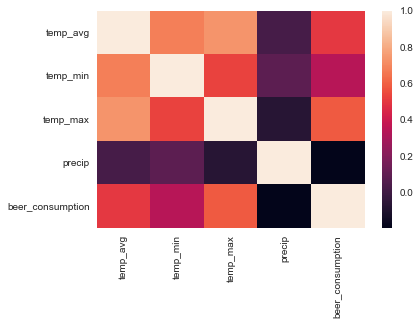

In [19]:
sns.heatmap(data.corr())

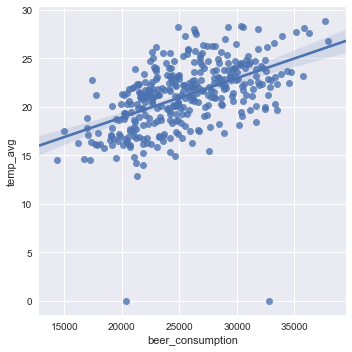

In [26]:
sns.lmplot("beer_consumption", "temp_avg", data)

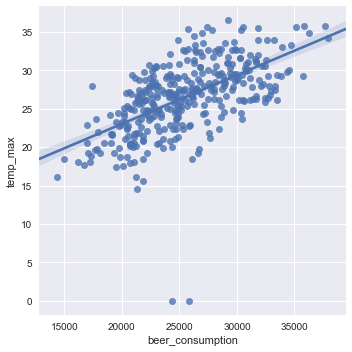

In [28]:
sns.lmplot("beer_consumption", "temp_max", data)

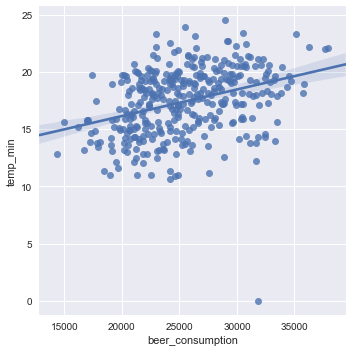

In [30]:
sns.lmplot("beer_consumption", "temp_min", data)

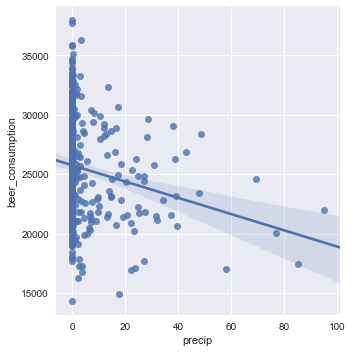

In [33]:
sns.lmplot("precip", "beer_consumption", data)

### Desafio 1
Analise os dados da fonte "data/beer_consumption.xlsx” em busca de valores nulos, inválidos ou ainda correlacionados, e proponha uma forma de preservá-los.  
Antes de realizar qualquer data imputation, mapeie valores de classe como números inteiros.

In [44]:
data.isnull().any()

data                False
temp_avg             True
temp_min             True
temp_max             True
precip              False
weekend              True
beer_consumption    False
dtype: bool

In [66]:
data.isin([0]).sum()

data                  0
temp_avg              0
temp_min              1
temp_max              2
precip              218
weekend             259
beer_consumption      0
dtype: int64

In [67]:
data[data["temp_avg"].isnull()]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
168,2015-06-18,NaN,15.8,26.2,0.0,False,24534
181,2015-07-01,NaN,16.2,20.5,0.0,False,20824
309,2015-11-06,NaN,18.0,22.8,0.0,False,20575
314,2015-11-11,NaN,19.8,32.7,0.0,False,29569


In [69]:
data[data["temp_max"].isnull()]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
98,2015-04-09,19.40,15.9,NaN,0.0,False,20298
165,2015-06-15,16.02,13.1,NaN,0.0,False,19119
237,2015-08-26,18.92,14.8,NaN,0.6,False,23357


In [70]:
data[data["temp_min"].isnull()]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
7,2015-01-08,24.90,NaN,32.8,48.6,False,28397
116,2015-04-27,19.82,NaN,24.9,0.0,False,21838


In [71]:
data[data["weekend"].isnull()]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
21,2015-01-22,21.74,19.2,0.0,31.0,NaN,25795
27,2015-01-28,25.68,20.1,29.9,4.9,NaN,22603


In [76]:
data["temp_avg"].replace(0, (data["temp_min"]+data["temp_max"])/2, inplace=True)
data["temp_avg"].replace(np.nan, (data["temp_min"]+data["temp_max"])/2, inplace=True)

In [78]:
data.loc[[168, 181, 309, 314]]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
168,2015-06-18,21.00,15.8,26.2,0.0,False,24534
181,2015-07-01,18.35,16.2,20.5,0.0,False,20824
309,2015-11-06,20.40,18.0,22.8,0.0,False,20575
314,2015-11-11,26.25,19.8,32.7,0.0,False,29569


In [81]:
data["temp_min"].replace(0, (data["temp_avg"]*2)-data["temp_max"], inplace=True)
data["temp_min"].replace(np.nan, (data["temp_avg"]*2)-data["temp_max"], inplace=True)

In [84]:
data["temp_max"].replace(0, (data["temp_avg"]*2)-data["temp_min"], inplace=True)
data["temp_max"].replace(np.nan, (data["temp_avg"]*2)-data["temp_min"], inplace=True)

In [86]:
data["weekend"].replace(np.nan, 0, inplace=True)

In [88]:
data.isnull().any()

data                False
temp_avg            False
temp_min            False
temp_max            False
precip              False
weekend             False
beer_consumption    False
dtype: bool

In [91]:
(data==0).any()

data                False
temp_avg            False
temp_min            False
temp_max            False
precip               True
weekend              True
beer_consumption    False
dtype: bool

In [93]:
class_weekend = {True: 1, False: 0}
data["weekend"] = data["weekend"].map(class_weekend)

In [96]:
from sklearn.model_selection import train_test_split

In [99]:
from sklearn.model_selection import train_test_split

feature_col_names = ['temp_max', 'precip', 'weekend']
predicted_class_names = ['beer_consumption']

X = data[feature_col_names].values
y = data[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=split_test_size, random_state=42)

In [101]:
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
from sklearn.metrics import mean_squared_error,r2_score

y_pred = lr_model.predict(X_test)

print('R2 score: %.2f' % r2_score(y_test, y_pred))
print('R2 score: %.2f' % lr_model.score(X_test, y_test))

R2 score: 0.75
R2 score: 0.75


In [106]:
predict_values = [[50, 0, 1]]
lr_model.predict(predict_values)

array([45067.00175193])

In [109]:
predict_values = [[1, 100, 0]]
lr_model.predict(predict_values)

array([1870.46421842])

In [115]:
from sklearn.externals import joblib

joblib.dump(lr_model,"linear_regression_v1.bin")

['linear_regression_v1.bin']

## Chamando API

In [116]:
import requests

In [120]:
r = requests.get("http://localhost:8080/hello")

In [122]:
r.text

'Hello World'